In [55]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image, display


In [56]:
def DisplayFractal(a,fmt='jpeg'):
    #显示一个迭代计数的数组作为分形的彩色图片。
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                         30 + 50 * np.sin(a_cyclic),
                         155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data = f.getvalue()))

In [57]:
sess = tf.InteractiveSession()

#使用NumPy创建一个在[-2,2]x[-2,2]范围内的2维复数数组
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X + 1j * Y

In [58]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs,tf.float32))

tf.global_variables_initializer().run()

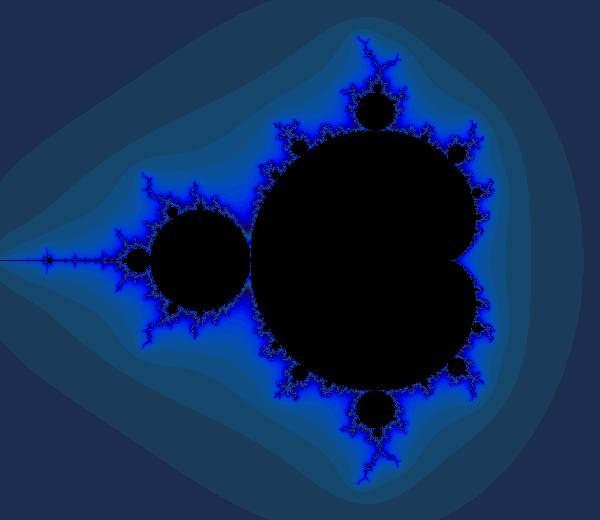

In [59]:
# 计算一个新值z: z^2 + x
zs_ = zs * zs + xs

# 这个新值会发散吗？
not_diverged = tf.abs(zs_) < 4

# 更新zs并且迭代计算。
# 说明：在这些值发散之后，我们仍然在计算zs，这个计算消耗特别大！
# 如果稍微简单点，这里有更好的方法来处理。
step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    )

for i in range(200): step.run()

DisplayFractal(ns.eval())